![](https://c4.wallpaperflare.com/wallpaper/768/883/729/close-up-photo-of-fruit-on-tree-with-shallow-dept-of-field-magnolia-japanese-magnolia-japanese-wallpaper-preview.jpg)



The sole purpose of me coding this notebook was to see if a fastai model is actually better than stock PyTorch coded model. Not to forget that the fastai library is actually coded on top PyTorch but there's no harm in trying. 

Check out my previous notebook where [I work on the same dataset using PyTorch.](https://www.kaggle.com/vyombhatia/98-02-accuracy-pytorch-resnet50)

# Table of Content

1. Libraries
2. DataLoader
3. Training
4. Predicting
5. Conclusion

# Libraries
Literally two lines of code for importing libraries.

In [1]:
from fastai.vision.all import *              # The asterisk '*' here mean everything.
from fastai.metrics import accuracy          # Using accuracy as metric for our model.

# DataLoader
DataLoader refers to the tool which helps us load our stuff into a format that woud make it easy for the model to process.

In [2]:
path = "../input/cotton-disease-dataset/Cotton Disease"

data = ImageDataLoaders.from_folder(path,                              # Path refers to where the folder containing the files is. 
                                    
                                    valid_pct = 0.3,                   # This refers to the ratio of validation data the model would test itself on.          
                                   
                                    bs = 4,                            # bs refers to Batch Size.
                                    
                                    shuffle_train = True,              # This shuffles the data before grabbing batches.
                                   
                                    item_tfms = Resize(512),           # item_tfms transforms the images to to the given specifications before 
                                                                       #  grabbing batches.
                                   
                                    batch_tfms = aug_transforms(       # batch_tfms transforms the batches.
                                        size = 256, min_scale = 0.75)) 

Lets take a look at the data:

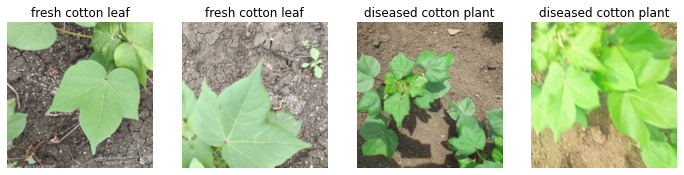

In [3]:
data.show_batch(nrows = 1, ncols = 4)

# Training
Finally, the most important part of this notebook. Training a model is quite easy and barely takes any code in fastai libraries. 

In [4]:
learn = cnn_learner(data,                          # data refers to the data preprocessed by the DataLoader
                    
                    densenet201,                   # Since we are using Transfer Learning here, lets import the DenseNet201 
                    
                    metrics = accuracy)         

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


In [5]:
# Training the model for 5 epochs:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.843740,0.203732,0.922078,01:54


epoch,train_loss,valid_loss,accuracy,time
0,0.644347,0.209493,0.922078,02:08
1,0.525889,0.267452,0.907648,02:08
2,0.336722,0.281700,0.910534,02:08
3,0.265232,0.047467,0.989899,02:07
4,0.200412,0.053789,0.979798,02:07


# Predicting:
Below is a confusion matrix and an image predicted.

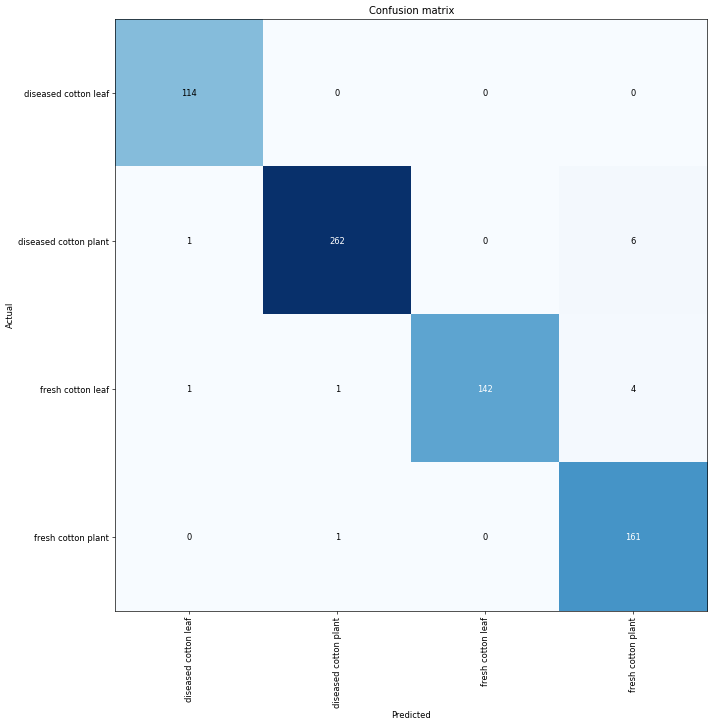

In [6]:
# Lets see where our classifier got confused:

interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

While our model did wrongly predict 4 cotton leaves as plants which is alright since the data augmentation might have cropped the images. There are 6 false positive which were classified as fresh cotton plant while they were actually diseased.

Image is of a diseased cotton leaf.


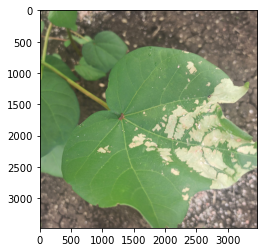

In [17]:
# Lets predict on a new images that the model has not seen:

img = plt.imread("../input/cotton-disease-dataset/Cotton Disease/test/diseased cotton leaf/dis_leaf (124).jpg")

classofimg, idx, probability = learn.predict(img)

print("Image is of a",classofimg + ".")\

plt.imshow(img)

And the result is right!

# Conclusion

FastAI is better.

This is the end of this notebook. Thank you for going through this. :))